In [4]:
# mount Google drive and import required libraries
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
import sys, os
import os
sys.path.append('/content/gdrive/MyDrive/Colab/ECE4078_2021_Lab_M3_Colab')
!ls '/content/gdrive/MyDrive/Colab/ECE4078_2021_Lab_M3_Colab'

import numpy as np
from PIL import Image
from detector import Detector
import matplotlib.pyplot as plt
import matplotlib.patches as label_box
from tqdm import tqdm
import os

# if ckpt = '' a random model will be used.
# set `ckpt = <path_to_weight_file>` to inspect performance of your trained model.
ckpt = '/content/gdrive/MyDrive/Colab/ECE4078_2021_Lab_M3_Colab/model/model.best.pth'
detector = Detector(ckpt, use_gpu=False)

Mounted at /content/gdrive
args.py		   detector_debugger.ipynb  model	   trainer.py
cmd_printer.py	   detector.py		    __pycache__
dataCollection.py  imdb.py		    res18_skip.py
dataset		   main_colab.ipynb	    test_images

======================== warning ==========================
This detector uses "RGB" input convention by default
If you are using Opencv, the image is likely to be in "BRG"!!!



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


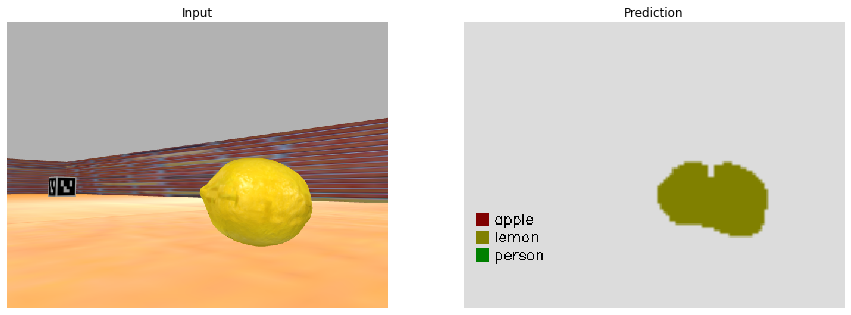

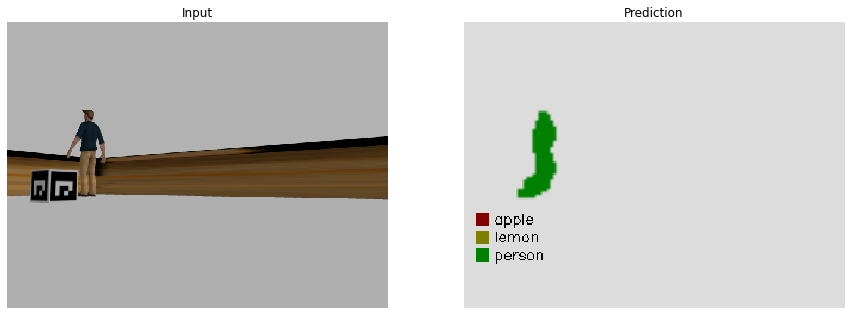

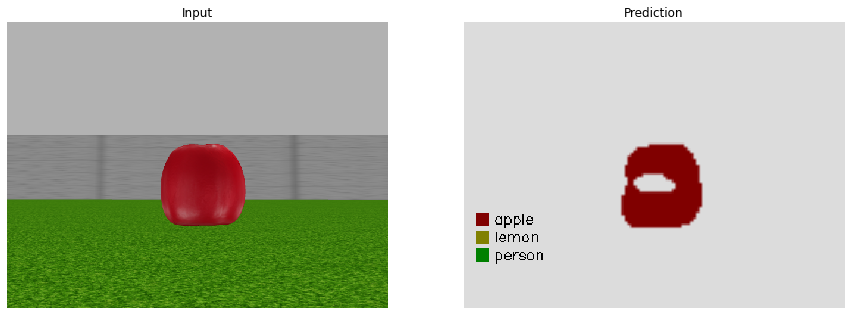

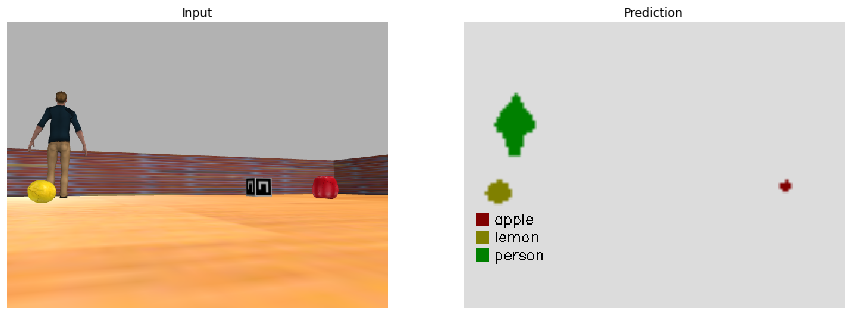

In [3]:
# run the detector on the test images
test_dir = "/content/gdrive/MyDrive/Colab/ECE4078_2021_Lab_M3_Colab/test_images/sim"
pred_dir = os.path.join(test_dir, "pred")
os.makedirs(pred_dir, exist_ok=True)
all_test_images = [file for file in os.listdir(test_dir) if file.endswith('.png')] 
for image_name in all_test_images:
    np_img = np.array(Image.open(os.path.join(test_dir, image_name)))
    pred, colour_map = detector.detect_single_image(np_img)
    title = ["Input", "Prediction"]
    pics = [np_img, colour_map]
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(pics[0], interpolation='nearest')
    axs[0].set_title(title[0])
    axs[1].imshow(pics[1], interpolation='nearest')
    axs[1].set_title(title[1])
    axs[0].axis('off')
    axs[1].axis('off')
    path = os.path.join(pred_dir, image_name)
    plt.savefig(os.path.join(pred_dir, image_name[:-4]+'.jpg'))